# Lab 01. 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

- 시계열 데이터를 생성하고 데이터 프레임을 생성한다.

In [2]:
pd.set_option('display.max_rows', 500)

# 시계열 데이터 생성 
dataes = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dataes, 
    'Value' : values
})

- 이동 평균과 이동 표준 편차를 계산한다. 

In [3]:
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()

print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6     -0.118863
7     -0.246686
8     -0.216694
9     -0.043519
10    -0.155395
11    -0.171913
12    -0.068078
13    -0.004758
14     0.034508
15     0.023468
16    -0.078830
17     0.023826
18    -0.103202
19    -0.340567
20    -0.301158
21    -0.202807
22    -0.098418
23     0.237090
24     0.113908
25     0.418200
26     0.339049
27     0.168720
28    -0.094825
29    -0.054991
30    -0.481441
31    -0.609390
32    -0.719903
33    -0.619413
34    -0.387202
35    -0.299426
36     0.009111
37     0.334713
38     0.437693
39     0.333767
40     0.438779
41     0.604181
42     0.555076
43     0.331391
44     0.049044
45     0.049036
46     0.040958
47    -0.167538
48    -0.307098
49    -0.287496
50    -0.871726
51    -0.585616
52    -0.346493
53    -0.111229
54     0.046427
55     0.147965
56     0.160168
57     0.683526
58     0.422106
59     0.411032
60     0.396715
61     0.446057
62     0

- 임계값을 설정하고 이상치를 탐지한다. 

In [4]:
threahold_multiplier = 2     # 임계값 계수 
data['Threshold'] = data['MovingAverage'] + threahold_multiplier * data['MovingStd']

# print(data['Threahold'])

# 이상치 탐지 -> 임계값을 초과 하는 경우에는 True(이상치)로 설정한다. 
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

- 시각화를 해본다.

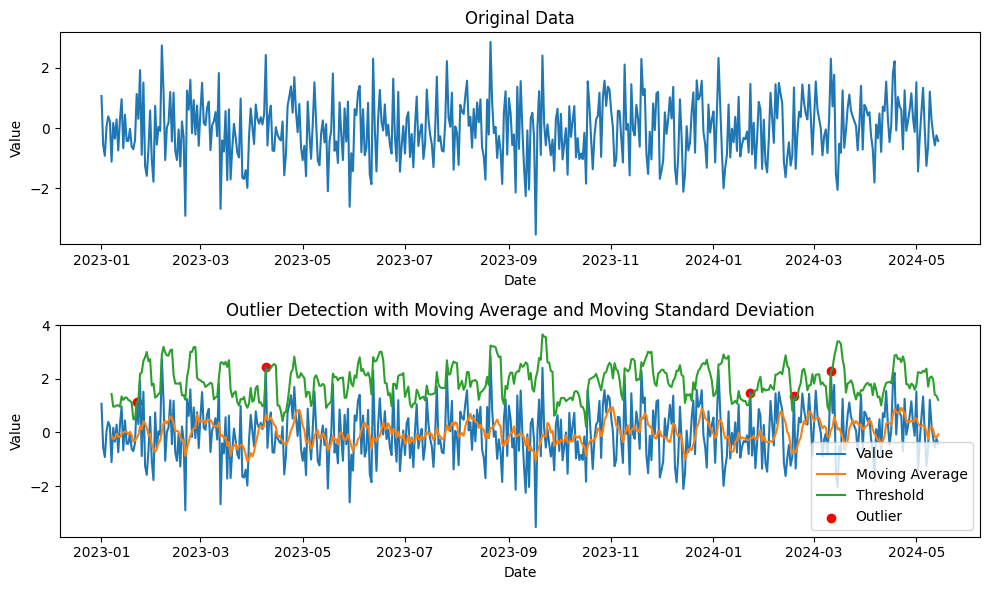

In [5]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.tight_layout()

plt.show()